**Лабораторная работа № 5**

Кубышкина Екатерина, БПМ161

5.1.11, 5.5.2, 5.6.6, 5.8.1

**5.1.11**

Функция $y=f(x)$ задана таблицей значений $y_0, y_1,... y_n$ в точках $x_0,x_1,...,x_n$. Используя метод
наименьших квадратов (МНК), найти многочлен $Pm(x)=a_0+ a_1x+...+a_m x^m$ наилучшего
среднеквадратичного приближения оптимальной степени $m=m^*$. За оптимальное значение $m^*$ принять ту
степень многочлена, начиная с которой величина $\sigma_m=\sqrt{\frac{1}{n-m}\sum\limits_{k=0}^n(P_m(x_k)-y_k)^2}$ стабилизируется или начинает возрастать

1.Задать векторы $x$ и $y$ исходных данных. 

In [3]:
import numpy as np
X=np.array([0, 0.17, 0.33, 0.5, 0.67, 0.83, 1, 1.17, 1.33, 1.5, 1.67, 1.83,2])
Y=np.array([2.25, 1.106, 0.3951, -0.0334, -0.20, -0.1137, 0.0294, 0.1008, 0.3, -0.0021, -0.3682,-1.119,-2.226])

2.Составить в явном виде нормальную систему метода наименьших квадратов и решить ее, используя стандартные средства 
линейной алгебры, найти многочлены $P_m, m=0,1,2,...$ по методу наименьших квадратов. Вычислить соответствующие им значения $\sigma_m$

In [4]:
def MNK(X,Y,m):
     A = np.array([[x**j for j in range(m + 1)] for x in X])
     return np.linalg.solve(A.T.dot(A), A.T.dot(Y))

def P_m_in_point(X,a):
    return [np.sum(x**np.arange(len(a)) * a) for x in X]

def all_sigma(X,Y,A):
    return [np.sum((P_m_in_point(X, a) - Y)**2) / (X.shape[0] - a.shape[0]) for a in A]

In [5]:
K=np.arange(10)
A=[]
for m in K:
    print(MNK(X,Y,m))
    A.append(MNK(X,Y,m))

[0.00914615]
[ 1.31914101 -1.30999485]
[ 1.31221732 -1.28734794 -0.01132345]
[ 2.26450846 -8.45188714  9.30704863 -3.10612403]
[ 2.27248306 -8.57533187  9.61060739 -3.34796043  0.0604591 ]
[ 2.24774753 -7.78536239  6.41805054  1.12406843 -2.49542333  0.51117648]
[ 2.24935946 -7.90239449  7.12787412 -0.39928162 -1.02453267 -0.1428554
  0.10900531]
[ 2.24987086 -7.99819872  7.92607763 -2.78929074  2.37413309 -2.62829835
  1.01186021 -0.12897927]
[  2.24959484  -7.83413123   6.17700021   4.05391113 -10.82876291
  11.2976156   -7.1680058    2.38196937  -0.31386856]
[   2.24983806   -8.42498039   13.73283782  -32.43454546   78.95369104
 -114.7251372    97.91979512  -49.09815949   13.36146181   -1.51947852]


In [6]:
sigmas = all_sigma(X, Y, A)
for s in sigmas: 
    print(s)

1.0782194526923077
0.38821247565216926
0.4270139783366075
0.002845118954148461
0.0031460043170243664
0.002455850622832528
0.0028516375143742955
0.003417224846626521
0.0042651650603488045
0.005655635107877799


3.Построить гистограмму зависимости $\sigma_m$ от $m$, на основании которой выбрать оптимальную степень $m^*$ многочлена наилучшего среднеквадратичного приближения.


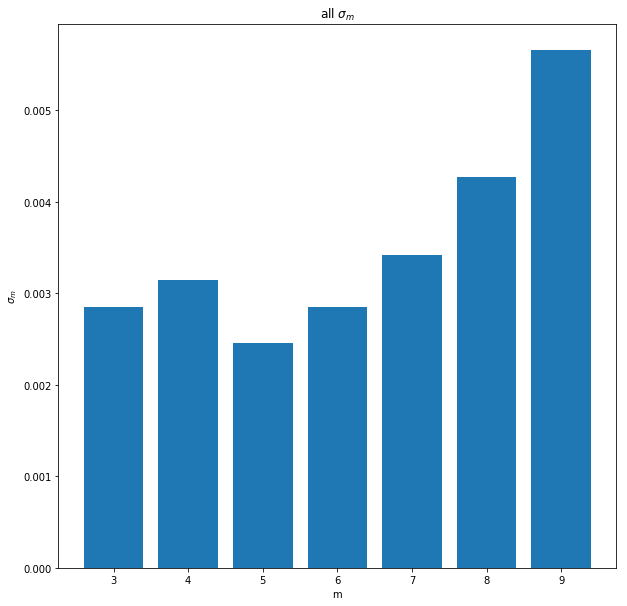

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.bar(K[3:], sigmas[3:])
plt.xlabel('m')
plt.ylabel('$\sigma_m$')
plt.title('all $\sigma_m$')
plt.show()

Из гистограммы видно, что оптимальное значение m = 5

4.На одном чертеже построить графики многочленов $P_m, m=0,1,2,..,m^*$, и точечный график исходной функции.

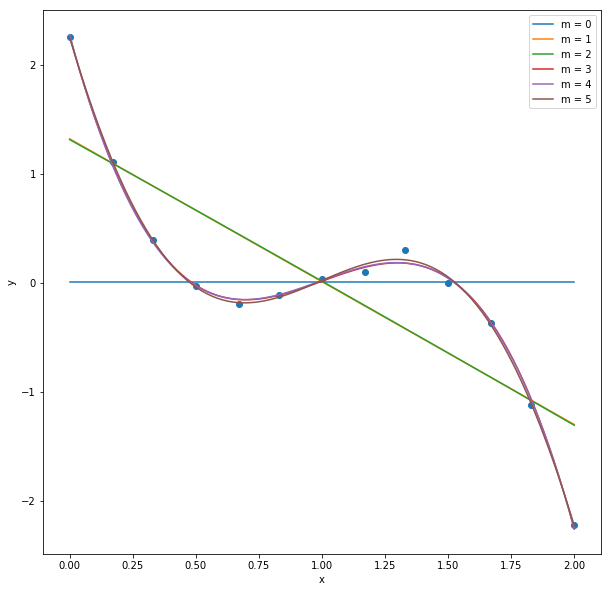

In [8]:
m_opt=5
plt.figure(figsize=(10,10))
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
X_m=np.linspace(min(X), max(X),100)
for m in range(m_opt+1):
    a=MNK(X,Y,m)
    Y_m = P_m_in_point(X_m, a)
    plt.plot(X_m,Y_m,label='m = '+str(m))
plt.legend()
plt.show()

5.Решить задачу МНК используя QR  разложение, не формируя матрицу левой части нормальной
системы в явном виде. Использовать стандартные библиотечные средства линейной алгебры для матричных
разложений. Сравнить результаты полученные с помошью решения нормальной системы МНК и матричных
разложений

In [9]:
import scipy.linalg

$A^TAw=A^Ty$

$A=QR$

$A^T=R^TQ^T$

$A^TA=R^TQ^TQR=R^TR$

$R^TRw=R^TQ^Ty$

$Rw=Q^Ty$

In [10]:
def MNK_QR(X, Y, m):
    A = np.array([[x**j for j in range(m + 1)] for x in X])
    Q, R = np.linalg.qr(A)
    return scipy.linalg.solve_triangular(R, Q.T.dot(Y))

np.allclose(MNK(X, Y, 5), MNK_QR(X, Y, 5))

True

**5.5.2**

Известно, что $y=c1sin(aπx)+c2cos(bπx)$, где коэффициенты $c1$ и $c2$ подлежат определению.
Используя метод наименьших квадратов, определить $c1$ и $c2$. 

In [11]:
x=np.array([-1+0.1*k for k in range(0,21)])
Y=np.array([-1.0044,-0.4724,-0.2432,-0.4119,-0.6785,-0.5996,-0.0449,0.7788,1.4016,1.4446,1.0099,0.4743,
           0.2475,0.4091,0.6512,0.6007,0.0361,-0.7662,-1.3814,-1.4429,-1.0072])

In [12]:
a=3
b=1
def f_1(x):
    return np.sin(a*np.pi*x)

def f_2(x):
    return np.cos(b*np.pi*x)

In [13]:
f_s=[f_1,f_2]
A=np.hstack((f_1(x)[:,None],f_2(x)[:,None]))

In [14]:
A

array([[-3.67394040e-16, -1.00000000e+00],
       [-8.09016994e-01, -9.51056516e-01],
       [-9.51056516e-01, -8.09016994e-01],
       [-3.09016994e-01, -5.87785252e-01],
       [ 5.87785252e-01, -3.09016994e-01],
       [ 1.00000000e+00,  6.12323400e-17],
       [ 5.87785252e-01,  3.09016994e-01],
       [-3.09016994e-01,  5.87785252e-01],
       [-9.51056516e-01,  8.09016994e-01],
       [-8.09016994e-01,  9.51056516e-01],
       [ 0.00000000e+00,  1.00000000e+00],
       [ 8.09016994e-01,  9.51056516e-01],
       [ 9.51056516e-01,  8.09016994e-01],
       [ 3.09016994e-01,  5.87785252e-01],
       [-5.87785252e-01,  3.09016994e-01],
       [-1.00000000e+00,  6.12323400e-17],
       [-5.87785252e-01, -3.09016994e-01],
       [ 3.09016994e-01, -5.87785252e-01],
       [ 9.51056516e-01, -8.09016994e-01],
       [ 8.09016994e-01, -9.51056516e-01],
       [ 3.67394040e-16, -1.00000000e+00]])

In [15]:
np.linalg.solve(A.T.dot(A),A.T.dot(Y))

array([-0.6003464 ,  1.00846266])

**5.8.1**

Дана функция $y=f(x)$. Приблизить $f(x)$ методом глобальной интерполяции при равномерном и
чебышевском распределениях узлов интерполяции. Сравнить качество приближения 

1.Составить программу-функцию построения интерполяционного многочлена при произвольном распределении
узлов (количество узлов - любое)

In [16]:
def f(x):
    return np.cos(x**2)
a=-np.pi
b=np.pi

k=15

In [17]:
def l_i(i,x,X):
    l=1
    for j in range(X.shape[0]):
        if j!= i:
            l*=(x-X[j])/(X[i]-X[j])
    return l

def L(x,X,Y):
    L=0
    for i in range(X.shape[0]):
        L+=Y[i]*l_i(i,x,X)
    return L

In [18]:
x_p=np.linspace(a,b,3*k)
y_p=f(x_p)

2.Используя составленную программу, вычислить приближенные значения функции $f(x)$ в $3k$ точках исходного
отрезка $[a, b]$ по $k$ узлам интерполяции, распределенным равномерно на отрезке. На одном чертеже построить
графики интерполяционного многочлена и исходной функции.

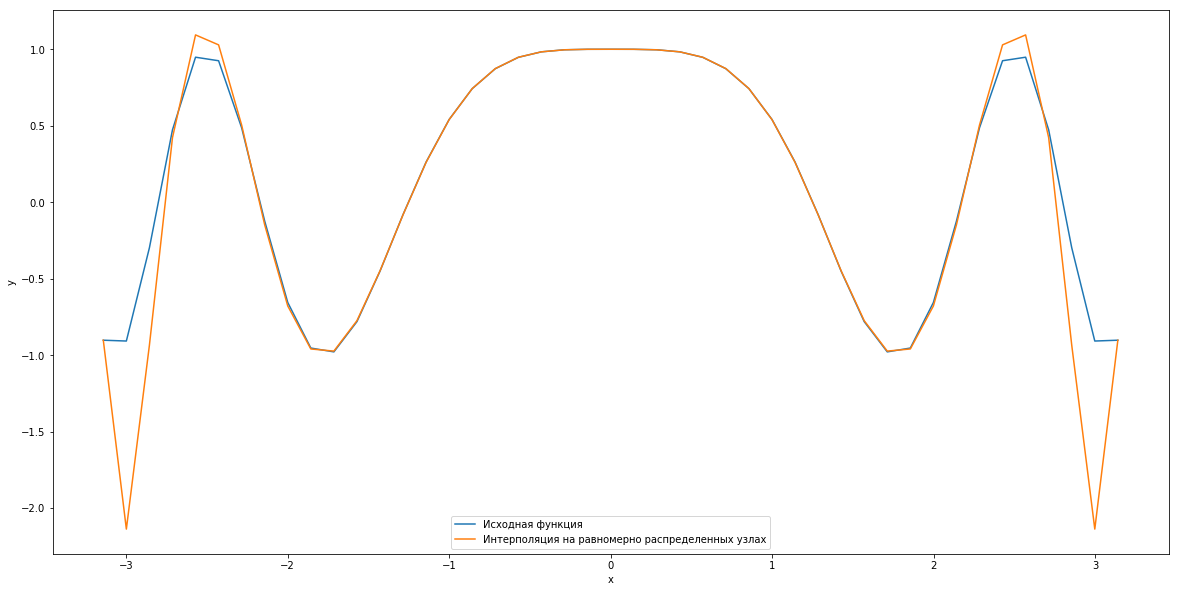

In [31]:
x_uniform=np.linspace(a,b,k)
y_uniform=f(x_uniform)

plt.figure(figsize=(20,10))
y_new=[L(x,x_uniform,y_uniform) for x in x_p]
plt.plot(x_p,y_p,label='Исходная функция')
plt.plot(x_p,y_new,label='Интерполяция на равномерно распределенных узлах')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
print("Равномерное распределение. k узлов. Max ошибка =", max(np.abs(y_p - y_new)))

Равномерное распределение. k узлов. Max ошибка = 1.2298366869478135


3.Используя составленную программу, вычислить приближенные значения функции $f(x)$ в тех же $3k$ точках
исходного отрезка по $k$ узлам интерполяции, имеющим чебышевское распределение. На одном чертеже
построить графики интерполяционного многочлена и исходной функции

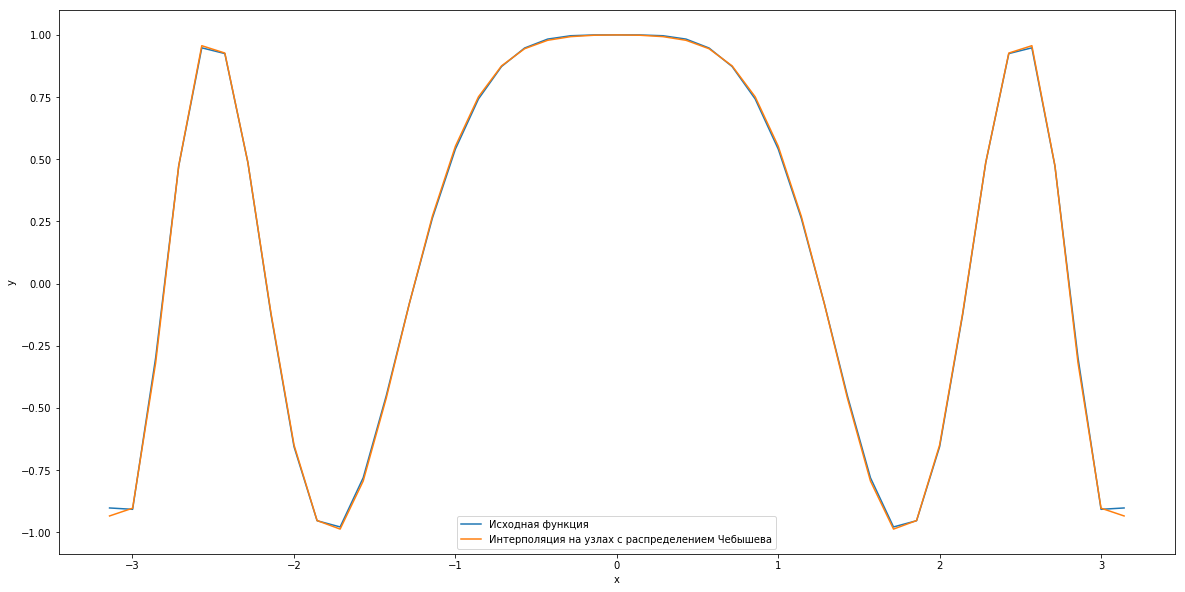

In [29]:
x_chebyshev=np.array([np.cos((2*i+1)/(2*k)*np.pi) for i in range(k)])*(b-a)*0.5+(b+a)*0.5
y_chebyshev=f(x_chebyshev)

plt.figure(figsize=(20,10))
y_new=[L(x,x_chebyshev,y_chebyshev) for x in x_p]
plt.plot(x_p,y_p,label='Исходная функция')
plt.plot(x_p,y_new,label='Интерполяция на узлах с распределением Чебышева')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [30]:
print("Распределение Чебышева. k узлов. Мax ошибка =", max(np.abs(y_p - y_new)))

Распределение Чебышева. k узлов. Мax ошибка = 0.03212708865055369


4.Сравнить качество приближения функции $f(x)$ при разном распределении узлов

В случае с распределением Чебышева интерполяционный многочлен лучше приближает исходную функцию

5.Выполнить то же самое, строя интерполяционный многочлен по 2k узлам интерполяции.


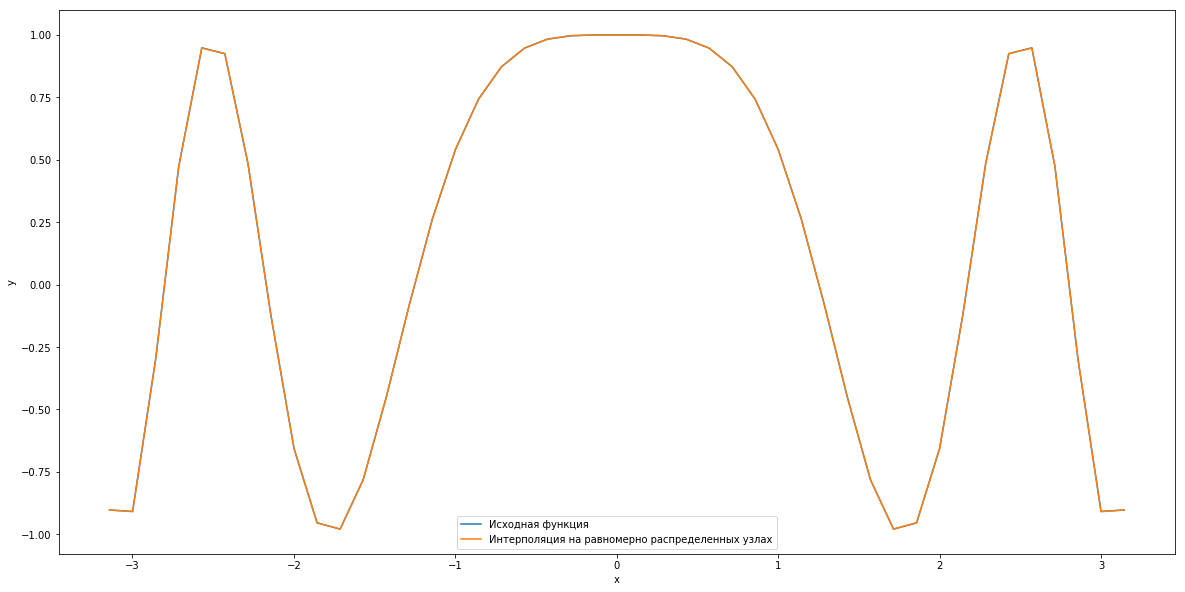

In [33]:
x_uniform=np.linspace(a,b,2*k)
y_uniform=f(x_uniform)
plt.figure(figsize=(20,10))
y_new=[L(x,x_uniform,y_uniform) for x in x_p]
plt.plot(x_p,y_p,label='Исходная функция')
plt.plot(x_p,y_new,label='Интерполяция на равномерно распределенных узлах')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [34]:
print("Равномерное распределение. 2k узлов. Max ошибка =", max(np.abs(y_p - y_new)))

Равномерное распределение. 2k узлов. Max ошибка = 0.0010141579787587007


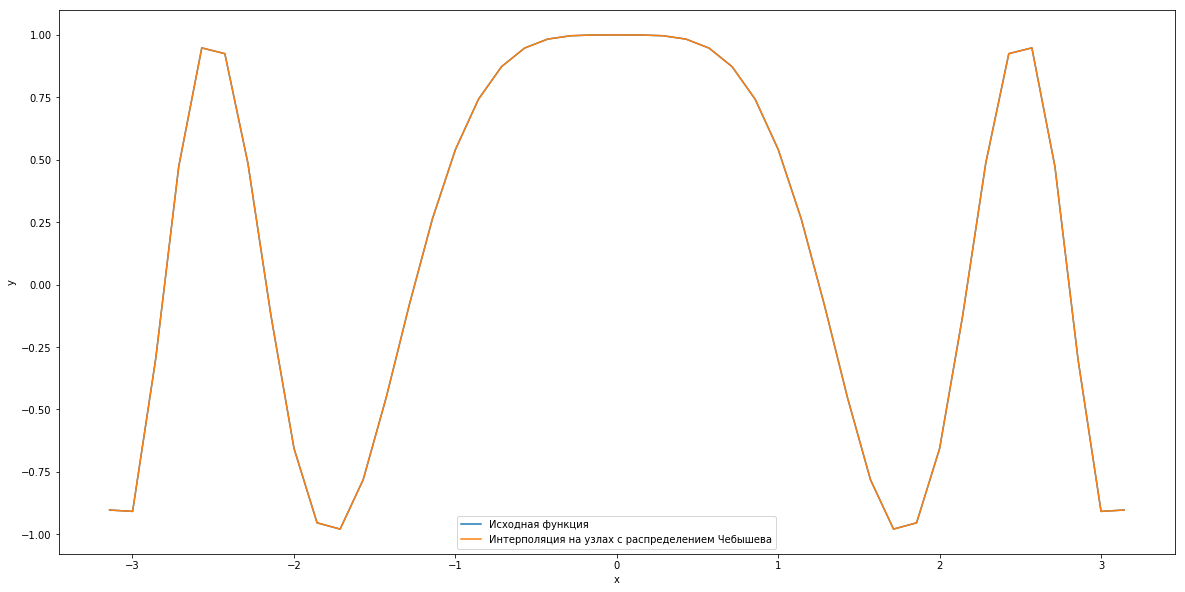

In [35]:
x_chebyshev=np.array([np.cos((2*i+1)/(4*k)*np.pi) for i in range(2*k)])*(b-a)*0.5+(b+a)*0.5#2k точек с чебышевским распределением
y_chebyshev=f(x_chebyshev)

plt.figure(figsize=(20,10))
y_new=[L(x,x_chebyshev,y_chebyshev) for x in x_p]
plt.plot(x_p,y_p,label='Исходная функция')
plt.plot(x_p,y_new,label='Интерполяция на узлах с распределением Чебышева')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [36]:
print("Распределение Чебышева. 2k узлов. Мax ошибка =", max(np.abs(y_p - y_new)))

Распределение Чебышева. 2k узлов. Мax ошибка = 8.231782225864848e-07


При увеличении количества узлов в 2 раза, многочлен стал лучше приближать исходную функцию, ошибки в обоих распределениях уменьшились.
Однако при распределении Чебышева ошибка остается меньше, чем при равномерном распределении.

**5.6.6**

Дана функция $y=f(x)$. Приблизить $f(x)$ на отрезке $[a,b]$ интерполяционными многочленами Лагранжа
1, 2, 3 степеней. На одном чертеже построить графики приближающих многочленов и функции $f(x)$. Для
многочлена 3 степени сравнить качество приближения при различном выборе узлов интерполяции. 

In [44]:
def f(x):
    return x**3*np.cos(x**2)
a=0
b=3

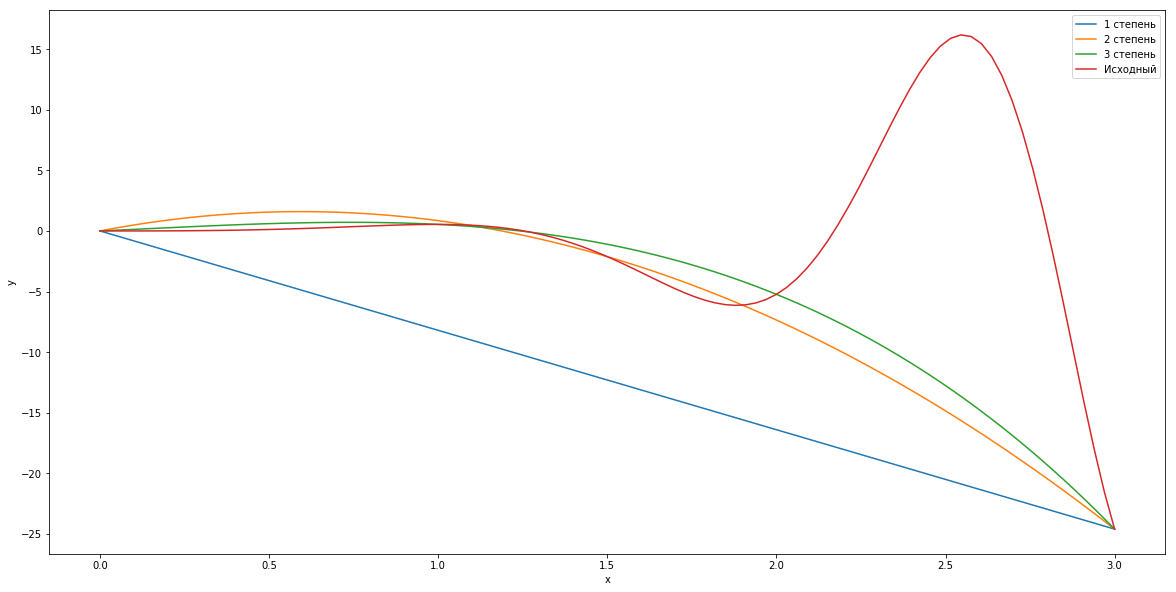

In [45]:
plt.figure(figsize=(20,10))
x_simple=np.linspace(a,b,100)
y_simple=f(x_simple)
for i in range(1,4):
    X=np.linspace(a,b,i+1)
    Y=f(X)
    plt.plot(x_simple,[L(x,X,Y) for x in x_simple],label=str(i)+' cтепень')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_simple,y_simple,label='Исходный')
plt.legend()

Различный выбор узлов интерполяции

[0.38572718 0.46956227 0.204748   0.71643664]
[0.9644216  0.03901953 0.22884113 0.98087238]
[0.53750793 0.07584911 0.69759318 0.88134717]


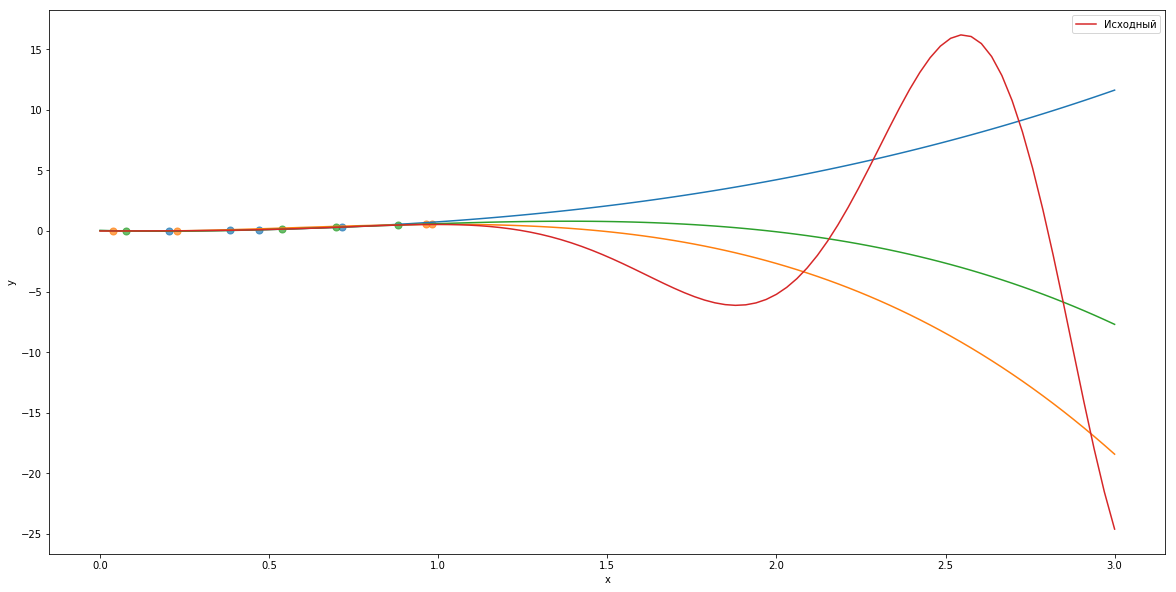

In [48]:
plt.figure(figsize=(20,10))
x_simple=np.linspace(a,b,100)
y_simple=f(x_simple)
for i in range(3):
    X=a+np.random.sample(4)
    print(X)
    Y=f(X)
    plt.scatter(X,Y,alpha=0.7,s=50)
    plt.plot(x_simple,[L(x,X,Y) for x in x_simple])
plt.plot(x_simple,y_simple,label='Исходный')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()